# Oefeningen neurale netwerken

### vraag 1

In [23]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [24]:
simpsons = pd.read_csv('./data/The Simpsons original.csv', delimiter=',')
simpsons.head

<bound method NDFrame.head of      name  hair length  weight  age gender
0   Homer            0     250   36      M
1   Marge           10     150   34      F
2    Bart            2      90   10      M
3    Lisa            6      78    8      F
4  Maggie            4      20    1      F
5     Abe            1     170   70      M
6   Selma            8     160   41      F
7    Otto           10     180   38      M
8  Krusty            6     200   45      M>

In [25]:
# b: Bepaal het type voorspelling
# Dit is een classificatieprobleem omdat we een categorische variabele (geslacht) voorspellen.

# Stap c: Identificeer onbruikbare kolommen
# We kunnen de 'name' kolom niet gebruiken voor voorspelling.
simpsons = simpsons.drop(columns=['name'])

In [26]:
# d: Bereid de trainingsdataset voor
# Normaliseer de invoerkenmerken
scaler = MinMaxScaler()
x_simpsons = scaler.fit_transform(simpsons[['hair length', 'weight', 'age']])

# Encodeer de uitvoerkolom
encoder = LabelEncoder()
y_simpsons = encoder.fit_transform(simpsons['gender'])

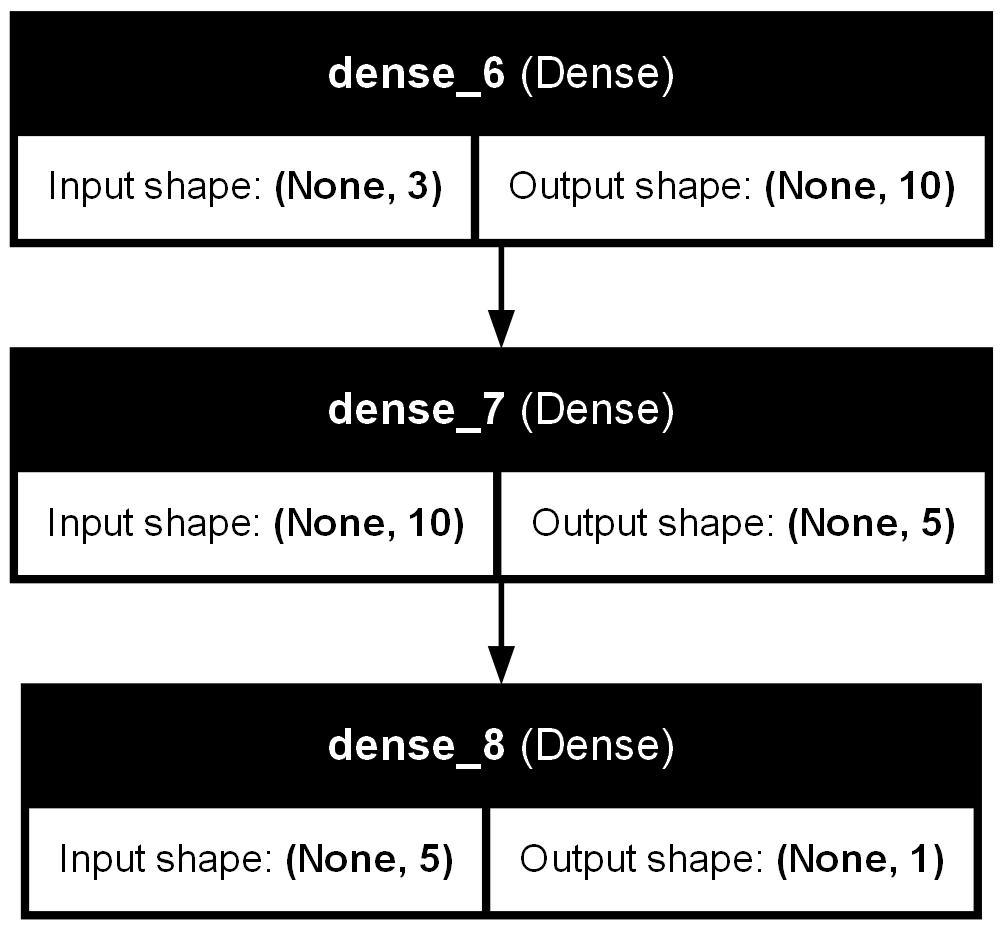

In [27]:
# e: Maak en train een neuraal netwerk
# Definieer het neurale netwerk
model = Sequential()
model.add(Input(shape=(3,)))  # Gebruik een Input layer om de input shape te specificeren
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compileer het model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train het model
model.fit(x_simpsons, y_simpsons, epochs=100, batch_size=5, verbose=0)

# Plot de architectuur van het neurale netwerk
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [28]:
# f: Maak voorspellingen
# Voorspel het geslacht van de Simpsons-personages
predictions = model.predict(x_simpsons)
predicted_genders = (predictions > 0.5).astype(int)
predicted_genders = encoder.inverse_transform(predicted_genders.flatten())

# Voorspel het geslacht van het onbekende personage (Comic guy)
comic_guy = scaler.transform([[8, 500, 38]])
comic_guy_prediction = model.predict(comic_guy)
comic_guy_gender = 'M' if comic_guy_prediction > 0.5 else 'F'

# Print resultaten
print("Voorspelde geslachten van Simpsons-personages:", predicted_genders)
print("Voorspeld geslacht van Comic guy:", comic_guy_gender)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Voorspelde geslachten van Simpsons-personages: ['M' 'F' 'M' 'F' 'F' 'M' 'M' 'M' 'M']
Voorspeld geslacht van Comic guy: M


C:\pythonenvironments\DS2\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### vraag 2

In [29]:
forecasting = pd.read_csv('./data/forcastdemo.csv', delimiter=';')
forecasting.head

<bound method NDFrame.head of     Year  Quarter  Revenu
0      1        1      20
1      1        2     100
2      1        3     175
3      1        4      13
4      2        1      37
5      2        2     136
6      2        3     245
7      2        4      26
8      3        1      75
9      3        2     155
10     3        3     326
11     3        4      48
12     4        1      92
13     4        2     202
14     4        3     384
15     4        4      82
16     5        1     176
17     5        2     282
18     5        3     445
19     5        4     181>

In [30]:
# b: Bepaal het type voorspelling
# Dit is een regressieprobleem omdat we een continue variabele (opbrengst) voorspellen.

# Stap c: Identificeer onbruikbare kolommen
# We kunnen de 'Year' en 'Quarter' kolommen niet direct gebruiken voor voorspelling.
forecasting = forecasting.drop(columns=['Year', 'Quarter'])

In [31]:
# d: Bereid de trainingsdataset voor
# Normaliseer de inputkenmerken
scaler = MinMaxScaler()
x_forecast = scaler.fit_transform(forecasting[['Revenu']])

# De uitvoerkolom is hetzelfde als de input in dit geval
y_forecast = forecasting['Revenu'].values

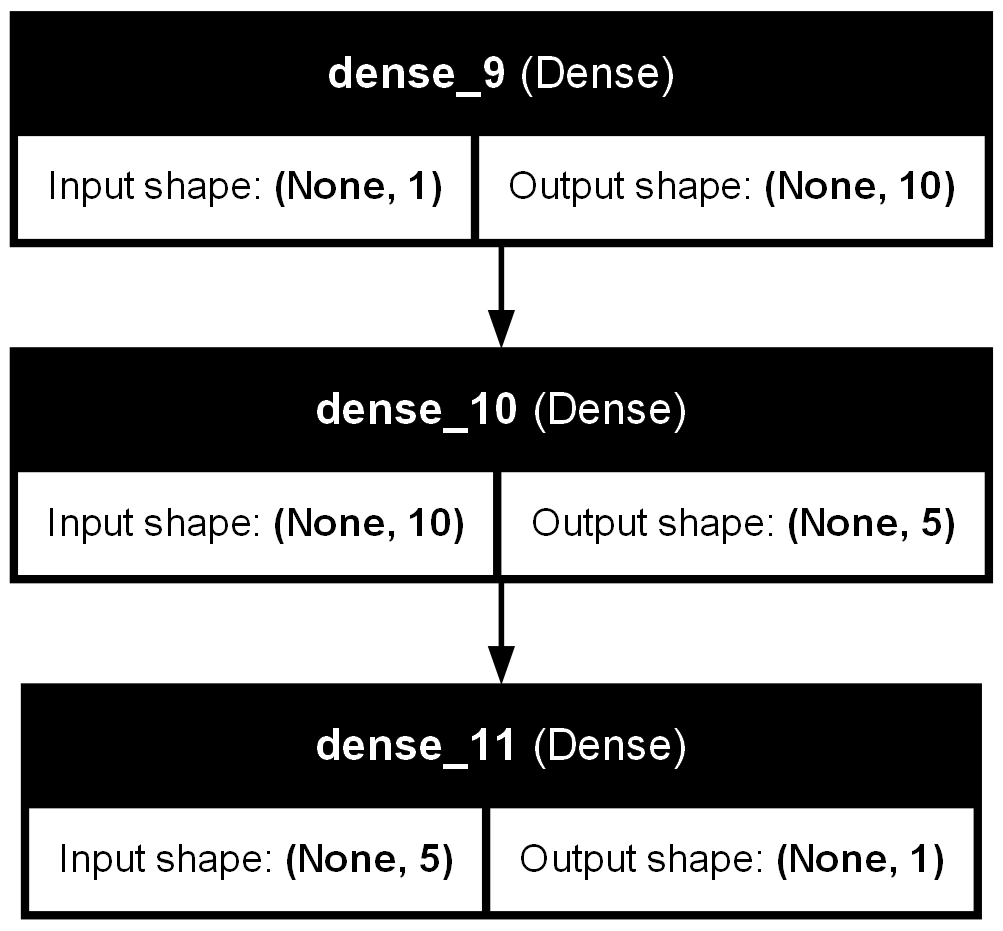

In [32]:
# e: Maak en train een neuraal netwerk
# Definieer het neurale netwerk
model = Sequential()
model.add(Input(shape=(1,)))  # Inputlaag met één kenmerk
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))  # Outputlaag voor regressie

# Compileer het model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train het model
model.fit(x_forecast, y_forecast, epochs=100, batch_size=5, verbose=0)

# Plot de architectuur van het neurale netwerk
plot_model(model, to_file='forecast_model_plot.png', show_shapes=True, show_layer_names=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


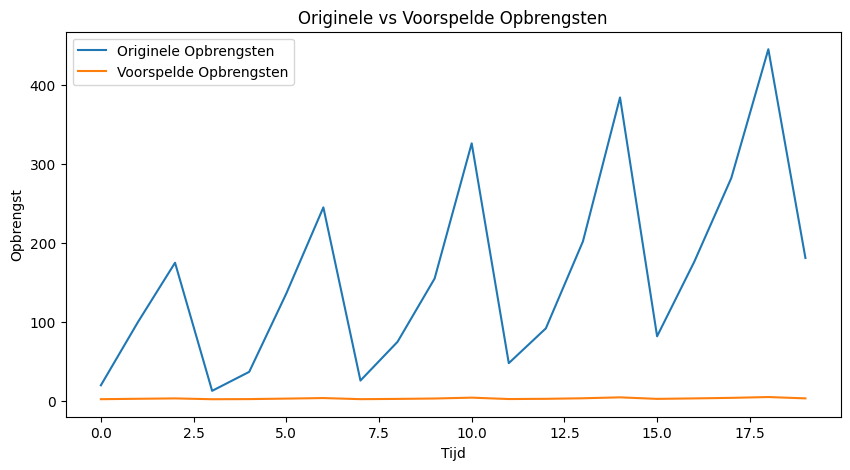

In [33]:
# f: Maak voorspellingen en plot resultaten
# Voorspel de opbrengsten
predicted_revenues = model.predict(x_forecast)

# Plot de originele en voorspelde opbrengsten
plt.figure(figsize=(10, 5))
plt.plot(y_forecast, label='Originele Opbrengsten')
plt.plot(predicted_revenues, label='Voorspelde Opbrengsten')
plt.xlabel('Tijd')
plt.ylabel('Opbrengst')
plt.title('Originele vs Voorspelde Opbrengsten')
plt.legend()
plt.show()

### vraag 3

In [34]:
iris = pd.read_csv('./data/iris.csv', delimiter=',')
iris.head

<bound method NDFrame.head of      sepal length  sepal width  petal length  petal width          target
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [35]:
# Stap b: Bepaal het type voorspelling
# Dit is een classificatieprobleem omdat we een categorische variabele (soort) voorspellen.

# Stap c: Identificeer onbruikbare kolommen
# We kunnen alle kolommen gebruiken voor voorspelling, maar we moeten de target kolom apart houden.
x_iris = iris.drop(columns=['target'])
y_iris = iris['target']

In [36]:
# Stap d: Bereid de input dataset voor
# Normaliseer de inputkenmerken met StandardScaler
scaler = StandardScaler()
x_iris = scaler.fit_transform(x_iris)

In [37]:
# Stap e: Creëer train- en test datasets
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris, y_iris, test_size=0.2, random_state=42)

Er is een fout opgetreden tijdens het trainen van het model: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\pythonenvironments\DS2\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\pythonenvironments\DS2\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\ponet\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Users\ponet\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Users\ponet\AppData\Local\Programs\Python\Pyt

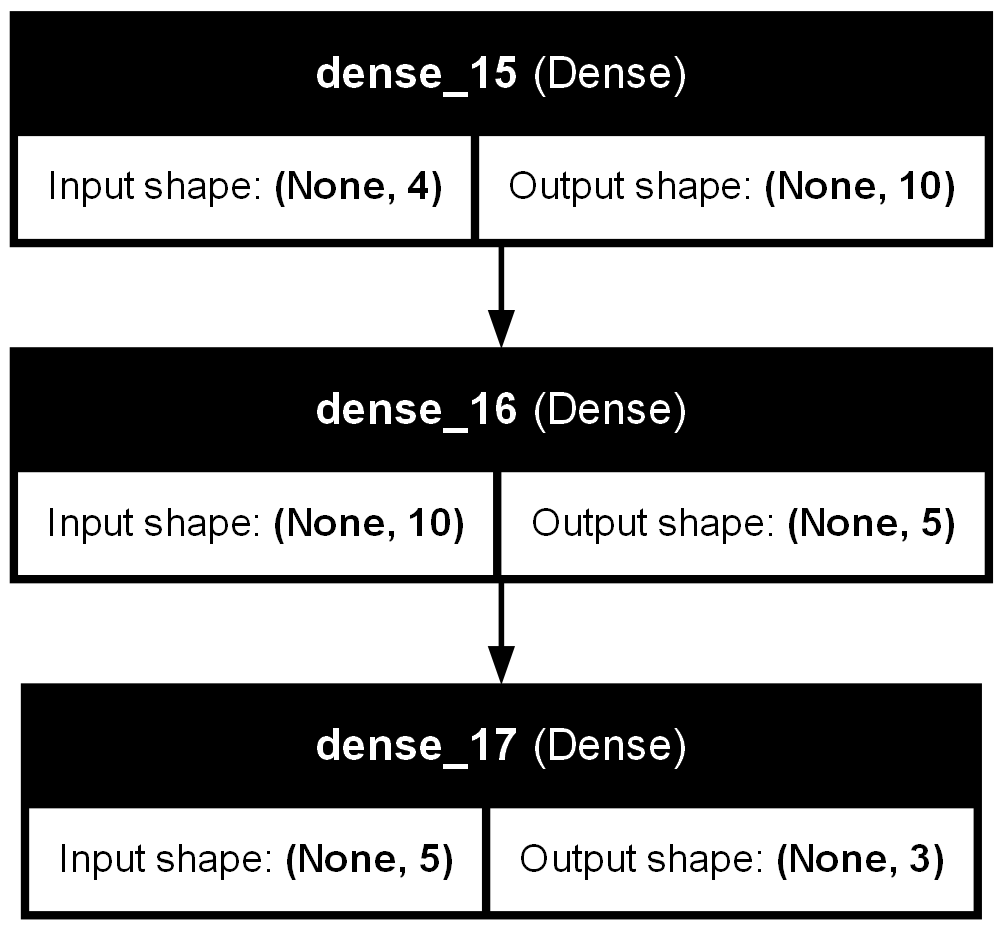

In [39]:
# Stap f: Maak en train een neuraal netwerk
# Definieer het neurale netwerk
model = Sequential()
model.add(Input(shape=(x_train_iris.shape[1],)))  # Inputlaag met het aantal kenmerken
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Outputlaag voor classificatie met 3 klassen

# Compileer het model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train het model
try:
    model.fit(x_train_iris, y_train_iris, epochs=100, batch_size=5, verbose=0)
except Exception as e:
    print(f"Er is een fout opgetreden tijdens het trainen van het model: {e}")

# Plot de architectuur van het neurale netwerk
plot_model(model, to_file='iris_model_plot.png', show_shapes=True, show_layer_names=True)

In [40]:
# Stap g: Evalueer het neurale netwerk
# Evalueer het model op de test dataset
loss, accuracy = model.evaluate(x_test_iris, y_test_iris, verbose=0)
print(f'Nauwkeurigheid: {accuracy * 100:.2f}%')

UnimplementedError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\pythonenvironments\DS2\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\pythonenvironments\DS2\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Users\ponet\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Users\ponet\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Users\ponet\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 84, in _run

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\pythonenvironments\DS2\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\pythonenvironments\DS2\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\ponet\AppData\Local\Temp\ipykernel_32004\3191102993.py", line 3, in <module>

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 425, in evaluate

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 161, in one_step_on_iterator

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 150, in one_step_on_data

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 81, in test_step

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\trainers\trainer.py", line 316, in compute_loss

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\trainers\compile_utils.py", line 609, in __call__

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\trainers\compile_utils.py", line 645, in call

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\losses\loss.py", line 39, in __call__

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\tree\tree_api.py", line 148, in map_structure

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\tree\optree_impl.py", line 79, in map_structure

  File "C:\pythonenvironments\DS2\Lib\site-packages\optree\ops.py", line 594, in tree_map

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\losses\loss.py", line 40, in <lambda>

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\ops\core.py", line 495, in convert_to_tensor

  File "C:\pythonenvironments\DS2\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 120, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/sparse_categorical_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_15147]